# **Install Future Hackathon**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Data Preparation

In [ ]:
# Datasetin yüklenmesi
file_path = '/content/drive/MyDrive/hackathon 2024 - Yapay Zeka.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Formatın time türüne çevirimi
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

In [11]:
# Gün hafta saat vs çıkarılması
df['Weekday'] = df['TIME_STAMP'].dt.weekday
df['Hour'] = df['TIME_STAMP'].dt.hour
df['Minute'] = df['TIME_STAMP'].dt.minute
df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Özel tatillerin belirtilmesi
holidays = [
    pd.Timestamp('2024-01-01'),  # 1 Ocak tatili
]
df['Holiday'] = df['TIME_STAMP'].dt.normalize().isin(holidays).astype(int)

# İlgili özelliklerim seçimesi
features = df[['DOWNLOAD', 'UPLOAD', 'Weekday', 'Hour', 'Minute', 'Weekend', 'Holiday']].values

NA Değerlerin çıkarılması





In [12]:
df = df.dropna(subset=['DOWNLOAD', 'UPLOAD'])
df = df[(np.isfinite(df['DOWNLOAD'])) & (np.isfinite(df['UPLOAD']))]

Veriyi *İnceleme*

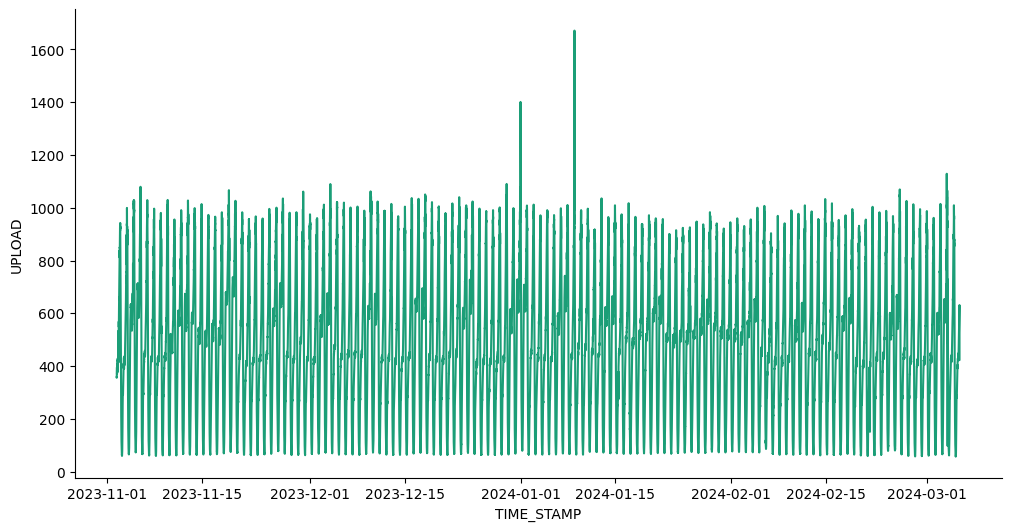

In [21]:
# @title TIME_STAMP vs UPLOAD

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TIME_STAMP']
  ys = series['UPLOAD']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('TIME_STAMP', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TIME_STAMP')
_ = plt.ylabel('UPLOAD')

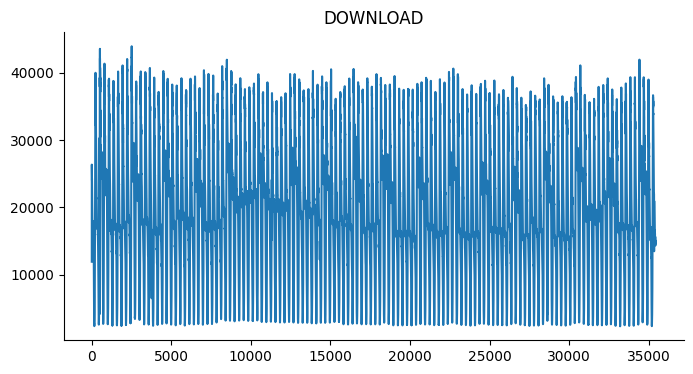

In [20]:
# @title DOWNLOAD

from matplotlib import pyplot as plt
df['DOWNLOAD'].plot(kind='line', figsize=(8, 4), title='DOWNLOAD')
plt.gca().spines[['top', 'right']].set_visible(False)

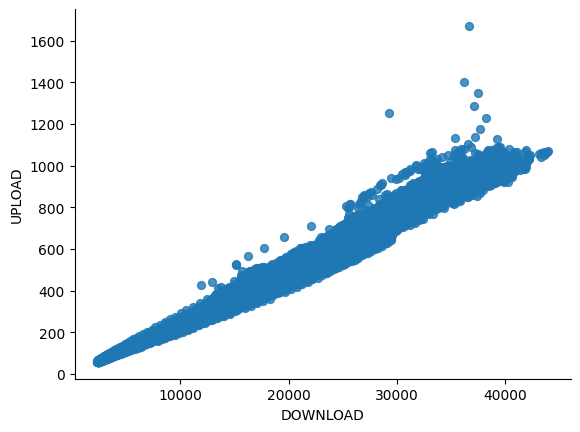

In [18]:
# @title DOWNLOAD vs UPLOAD

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='DOWNLOAD', y='UPLOAD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

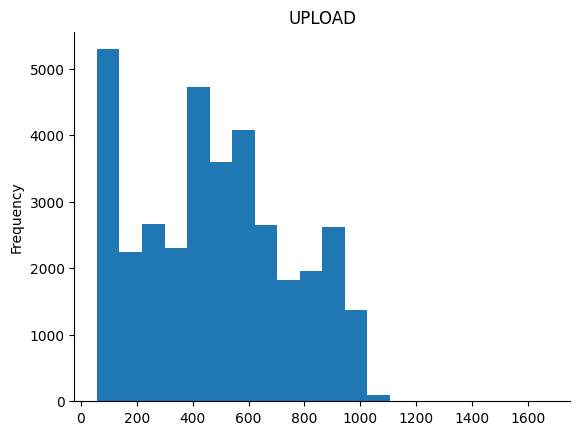

In [17]:
# @title UPLOAD

from matplotlib import pyplot as plt
df['UPLOAD'].plot(kind='hist', bins=20, title='UPLOAD')
plt.gca().spines[['top', 'right',]].set_visible(False)

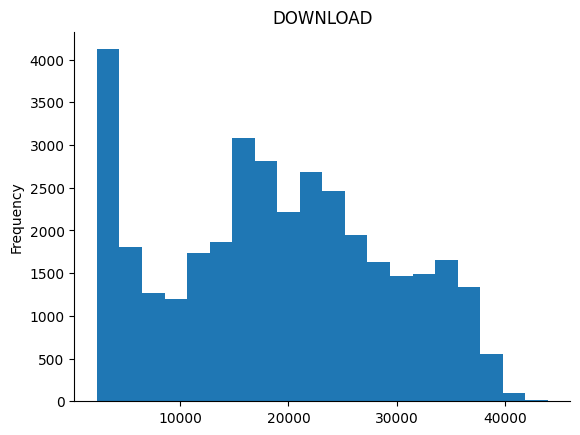

In [16]:
# @title DOWNLOAD

from matplotlib import pyplot as plt
df['DOWNLOAD'].plot(kind='hist', bins=20, title='DOWNLOAD')
plt.gca().spines[['top', 'right',]].set_visible(False)

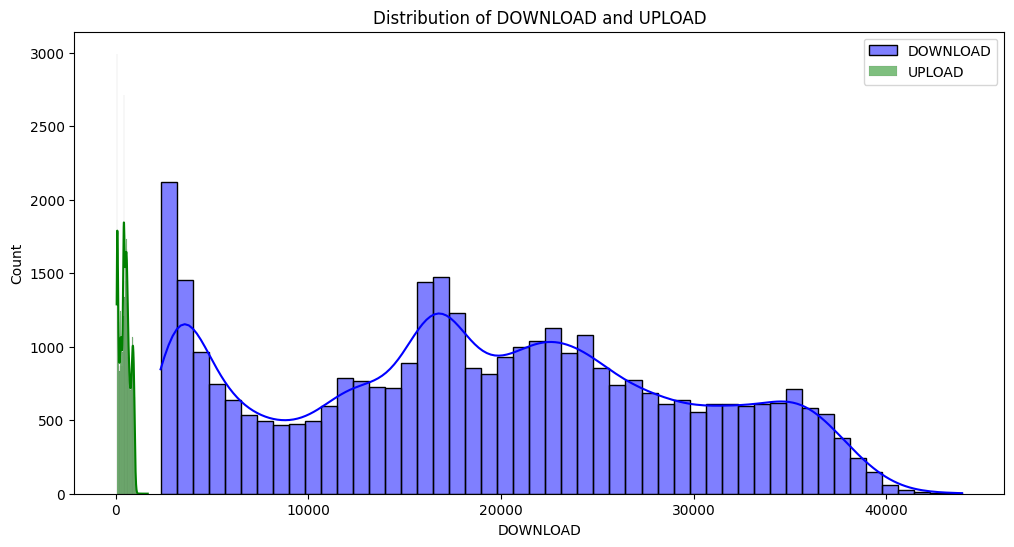

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize DOWNLOAD and UPLOAD data distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['DOWNLOAD'], bins=50, kde=True, color='blue', label='DOWNLOAD')
sns.histplot(df['UPLOAD'], bins=50, kde=True, color='green', label='UPLOAD')
plt.legend()
plt.title('Distribution of DOWNLOAD and UPLOAD')
plt.show()


# **SORU 1 ANOMALİ DETECTİON**

## **CUSTOM DBScan Machine Learning Algorithm Implementation**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt


In [3]:
# Load the data
file_path = '/content/drive/MyDrive/hackathon 2024 - Yapay Zeka.xlsx'
df = pd.read_excel(file_path)


In [4]:
# Convert TIME_STAMP to datetime format
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

In [5]:
# Extract additional features
df['Weekday'] = df['TIME_STAMP'].dt.weekday
df['Hour'] = df['TIME_STAMP'].dt.hour
df['Minute'] = df['TIME_STAMP'].dt.minute
df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [6]:
# Define holidays
holidays = [
    pd.Timestamp('2024-01-01'),  # New Year's Day
]
df['Holiday'] = df['TIME_STAMP'].dt.normalize().isin(holidays).astype(int)

# Select relevant features for anomaly detection
features = df[['DOWNLOAD', 'UPLOAD', 'Weekday', 'Hour', 'Minute', 'Weekend', 'Holiday']]

In [ ]:
# Scale features ( 0-1 normalizasyon for mesafe)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Recalculate the distance matrix with scaled features (öklid mesafesi)
dist_matrix = distance_matrix(scaled_features, scaled_features)

In [ ]:
# Adjust parameters
eps = 0.35  # radius
min_samples = 5  # minimum number of samples

# Komşu sayısı min_samples'dan azsa anomalidir
num_neighbors = np.sum(dist_matrix < eps, axis=1)

# Identify anomalies: points with fewer neighbors than min_samples
anomalies = num_neighbors < min_samples
df['Anomaly'] = anomalies

In [7]:
# Output the anomalies
anomalous_data = df[df['Anomaly']]
print("Anomalous Data Points:")
print(anomalous_data)

# Specific timestamp to highlight
highlight_timestamp = pd.Timestamp('2024-03-05 18:25:00')

# Check if there's an anomaly at the specific timestamp
anomaly_at_timestamp = df[(df['TIME_STAMP'] == highlight_timestamp) & df['Anomaly']]
if not anomaly_at_timestamp.empty:
    print(f"Anomaly detected at {highlight_timestamp}:")
    print(anomaly_at_timestamp)

Anomalous Data Points:
               TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD  Weekday  \
0     2024-03-05 18:25:00  10.0.901.xx Server 1  11927.017  424.700        1   
15    2024-03-05 17:10:00  10.0.901.xx Server 1        NaN  581.977        1   
45    2024-03-05 14:35:00  10.0.901.xx Server 1  17139.885      NaN        1   
151   2024-03-05 05:40:00  10.0.901.xx Server 1        NaN   64.172        1   
218   2024-03-05 00:00:00  10.0.901.xx Server 1  35069.264      NaN        1   
...                   ...                   ...        ...      ...      ...   
35262 2023-11-03 00:05:00  10.0.901.xx Server 1  29674.646  739.171        4   
35263 2023-11-03 00:00:00  10.0.901.xx Server 1  30814.625  777.105        4   
35264 2023-11-02 23:55:00  10.0.901.xx Server 1  31822.058  789.320        3   
35265 2023-11-02 23:50:00  10.0.901.xx Server 1  32312.908  803.128        3   
35347 2023-11-02 17:00:00  10.0.901.xx Server 1  13480.711  414.516        3   

       Hour  Min

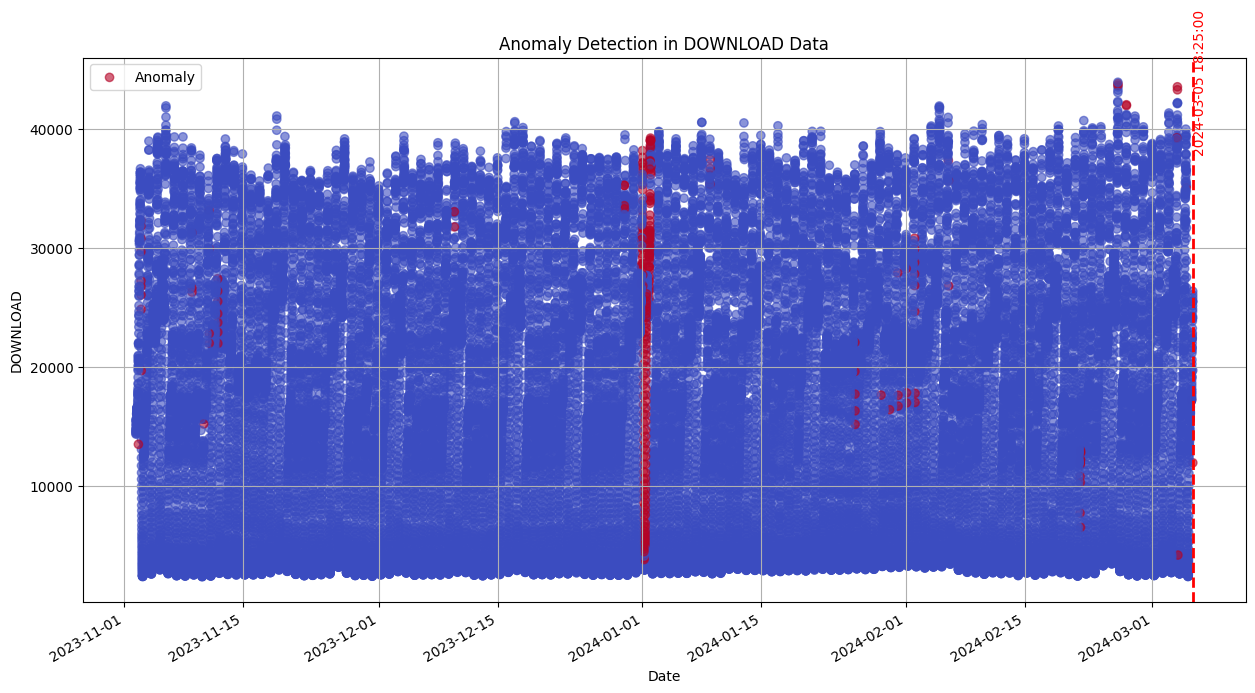

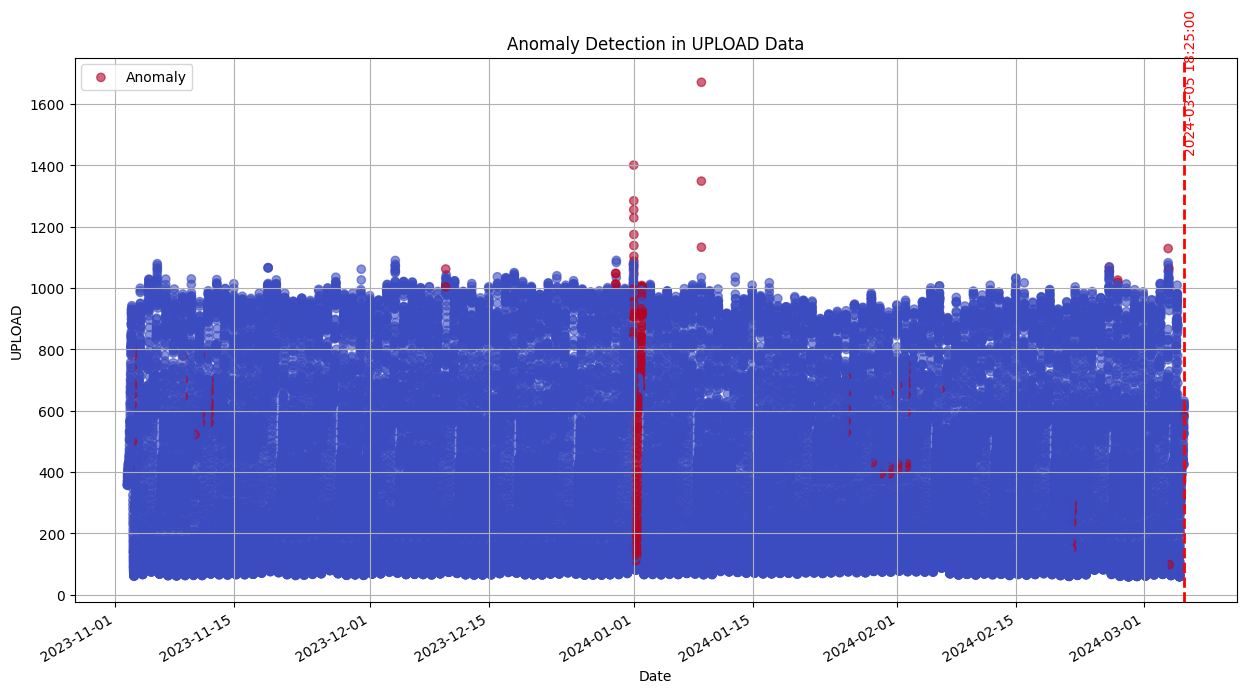

In [8]:
# Visualization for DOWNLOAD
plt.figure(figsize=(15, 8))
plt.scatter(df['TIME_STAMP'], df['DOWNLOAD'], c=df['Anomaly'], cmap='coolwarm', label='Anomaly', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('DOWNLOAD')
plt.title('Anomaly Detection in DOWNLOAD Data')
plt.grid(True)
plt.legend()
plt.axvline(highlight_timestamp, color='red', linestyle='--', lw=2, label='2024-03-05 18:25:00')
plt.text(highlight_timestamp, df['DOWNLOAD'].max(), '2024-03-05 18:25:00', rotation=90, verticalalignment='center', color='red')
plt.gcf().autofmt_xdate()
plt.show()

# Visualization for UPLOAD
plt.figure(figsize=(15, 8))
plt.scatter(df['TIME_STAMP'], df['UPLOAD'], c=df['Anomaly'], cmap='coolwarm', label='Anomaly', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('UPLOAD')
plt.title('Anomaly Detection in UPLOAD Data')
plt.grid(True)
plt.legend()
plt.axvline(highlight_timestamp, color='red', linestyle='--', lw=2, label='2024-03-05 18:25:00')
plt.text(highlight_timestamp, df['UPLOAD'].max(), '2024-03-05 18:25:00', rotation=90, verticalalignment='center', color='red')
plt.gcf().autofmt_xdate()
plt.show()


# **SORU 2 Time Series Forecasting**

Gerekli Kütüphanelerin Yüklenmesi

In [5]:
pip install pandas statsmodels matplotlib

In [8]:
# Remove or fill NaN or infinite values if they exist
df = df.dropna(subset=['DOWNLOAD', 'UPLOAD'])
df = df[(np.isfinite(df['DOWNLOAD'])) & (np.isfinite(df['UPLOAD']))]

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
# Load the data
df = pd.read_excel("/content/drive/MyDrive/hackathon 2024 - Yapay Zeka.xlsx")

In [ ]:
# Prepare the download data for Prophet
df_download = df[['TIME_STAMP', 'DOWNLOAD']].rename(columns={'TIME_STAMP': 'ds', 'DOWNLOAD': 'y'})
df_download['ds'] = pd.to_datetime(df_download['ds'])

# Prepare the upload data for Prophet
df_upload = df[['TIME_STAMP', 'UPLOAD']].rename(columns={'TIME_STAMP': 'ds', 'UPLOAD': 'y'})
df_upload['ds'] = pd.to_datetime(df_upload['ds'])

In [ ]:
# Create and fit the model for download data
model_download = Prophet(interval_width=0.99)
model_download.fit(df_download)

# Create and fit the model for upload data
model_upload = Prophet(interval_width=0.99) # tahmin aralağına ilişkin doğruluk
model_upload.fit(df_upload)

# Make predictions for the next week for download
future_download = model_download.make_future_dataframe(periods=24*7, freq='H')  #1 haftalık zaman dilimi 24*7
forecast_download = model_download.predict(future_download)

# Make predictions for the next week for upload
future_upload = model_upload.make_future_dataframe(periods=24*7, freq='H')
forecast_upload = model_upload.predict(future_upload)

In [ ]:
# Combine actual values with predictions for download
forecast_download = forecast_download.set_index('ds').join(df_download.set_index('ds'))
forecast_download.reset_index(inplace=True)

# Combine actual values with predictions for upload
forecast_upload = forecast_upload.set_index('ds').join(df_upload.set_index('ds'))
forecast_upload.reset_index(inplace=True)

# Set tolerance level for anomaly detection (e.g., 5%)
tolerance = 0.05

In [ ]:
# Detect anomalies for download data
forecast_download['anomaly'] = forecast_download.apply(
    lambda row: 1 if not pd.isna(row['y']) and (
        (row['y'] < row['yhat_lower'] - row['yhat_lower'] * tolerance) or
        (row['y'] > row['yhat_upper'] + row['yhat_upper'] * tolerance)) else 0,
    axis=1
)
anomalies_download = forecast_download[forecast_download['anomaly'] == 1]

# Detect anomalies for upload data
forecast_upload['anomaly'] = forecast_upload.apply(
    lambda row: 1 if not pd.isna(row['y']) and (
        (row['y'] < row['yhat_lower'] - row['yhat_lower'] * tolerance) or
        (row['y'] > row['yhat_upper'] + row['yhat_upper'] * tolerance)) else 0,
    axis=1
)
anomalies_upload = forecast_upload[forecast_upload['anomaly'] == 1]

# Get the last date in the actual data
last_date_download = df_download['ds'].max()
last_date_upload = df_upload['ds'].max()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbv4rizmj/r7w2qnlf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbv4rizmj/y06dt2vr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33392', 'data', 'file=/tmp/tmpbv4rizmj/r7w2qnlf.json', 'init=/tmp/tmpbv4rizmj/y06dt2vr.json', 'output', 'file=/tmp/tmpbv4rizmj/prophet_modeliacw_xaf/prophet_model-20240725104340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

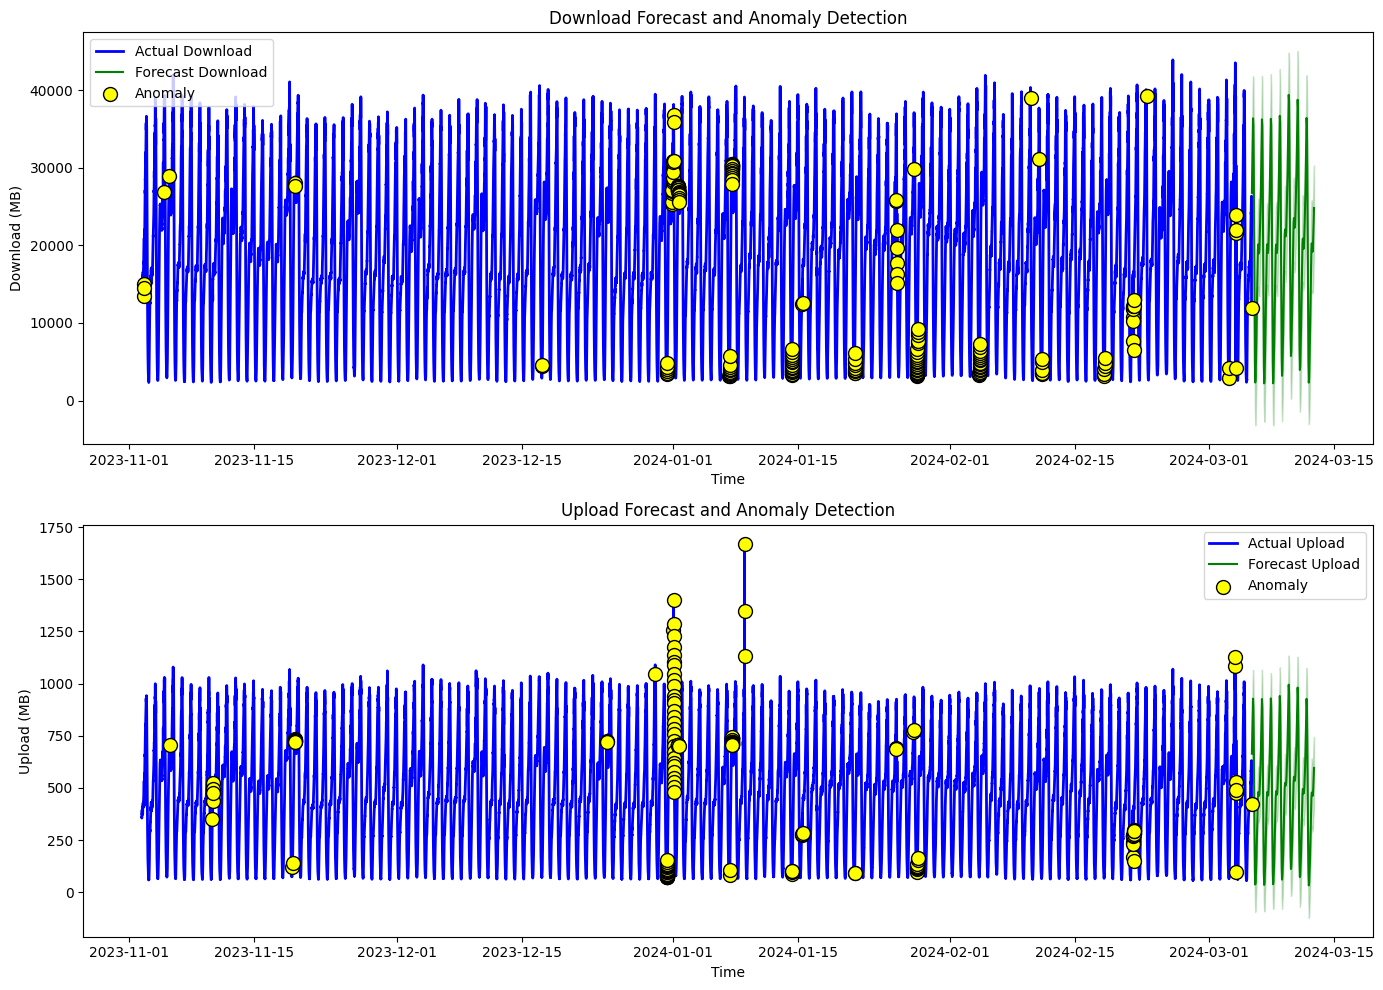

Forecasted download value at 2024-03-05 18:25:00:                  ds         yhat   yhat_lower  yhat_upper
2024-03-05 18:25:00 24613.113425 19274.060931 30153.27817
Forecasted upload value at 2024-03-05 18:25:00:                  ds      yhat  yhat_lower  yhat_upper
2024-03-05 18:25:00 595.45507  465.391544  715.555993


In [12]:
# Visualize the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot download data
ax1.plot(df_download['ds'], df_download['y'], 'b-', linewidth=2, label='Actual Download')  # Thick blue line for actual data
# Plot forecast only for future dates
ax1.plot(forecast_download[forecast_download['ds'] > last_date_download]['ds'],
         forecast_download[forecast_download['ds'] > last_date_download]['yhat'],
         'g-', label='Forecast Download')  # Green line for forecast
ax1.fill_between(forecast_download[forecast_download['ds'] > last_date_download]['ds'],
                 forecast_download[forecast_download['ds'] > last_date_download]['yhat_lower'],
                 forecast_download[forecast_download['ds'] > last_date_download]['yhat_upper'],
                 color='g', alpha=0.2)
ax1.scatter(anomalies_download['ds'], anomalies_download['y'], color='yellow', edgecolor='black', marker='o', s=100, zorder=5, label='Anomaly')
ax1.set_title('Download Forecast and Anomaly Detection')
ax1.set_xlabel('Time')
ax1.set_ylabel('Download (MB)')
ax1.legend()

# Plot upload data
ax2.plot(df_upload['ds'], df_upload['y'], 'b-', linewidth=2, label='Actual Upload')  # Thick blue line for actual data
# Plot forecast only for future dates
ax2.plot(forecast_upload[forecast_upload['ds'] > last_date_upload]['ds'],
         forecast_upload[forecast_upload['ds'] > last_date_upload]['yhat'],
         'g-', label='Forecast Upload')  # Green line for forecast
ax2.fill_between(forecast_upload[forecast_upload['ds'] > last_date_upload]['ds'],
                 forecast_upload[forecast_upload['ds'] > last_date_upload]['yhat_lower'],
                 forecast_upload[forecast_upload['ds'] > last_date_upload]['yhat_upper'],
                 color='g', alpha=0.2)
ax2.scatter(anomalies_upload['ds'], anomalies_upload['y'], color='yellow', edgecolor='black', marker='o', s=100, zorder=5, label='Anomaly')
ax2.set_title('Upload Forecast and Anomaly Detection')
ax2.set_xlabel('Time')
ax2.set_ylabel('Upload (MB)')
ax2.legend()

plt.tight_layout()
plt.show()

# Print the specific values for the timestamp "2024-03-05 18:25:00"
specific_time = "2024-03-05 18:25:00"
specific_value_download = forecast_download.loc[forecast_download['ds'] == specific_time]
specific_value_upload = forecast_upload.loc[forecast_upload['ds'] == specific_time]

print(f"Forecasted download value at {specific_time}: {specific_value_download[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_string(index=False)}")
print(f"Forecasted upload value at {specific_time}: {specific_value_upload[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_string(index=False)}")


# **Bonus Soru**

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/hackathon 2024 - Yapay Zeka.xlsx'
df = pd.read_excel(file_path)


In [ ]:
# Convert TIME_STAMP to datetime
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

# Extract the hour from TIME_STAMP
df['Hour'] = df['TIME_STAMP'].dt.hour

# Calculate total traffic (sum of DOWNLOAD and UPLOAD)
df['Total_Traffic'] = df['DOWNLOAD'] + df['UPLOAD']

# Group by hour and calculate the mean total traffic for each hour
hourly_traffic = df.groupby('Hour')['Total_Traffic'].mean().sort_values(ascending=False)
print(hourly_traffic)

Hour
23    36943.963823
22    36883.651872
21    33791.481569
20    31342.165981
0     31266.333376
19    28444.506700
18    25182.192884
17    23331.374803
16    21687.628583
12    20653.106858
13    20507.400883
15    20049.955967
1     19899.072017
11    19782.289286
14    19730.053512
10    17570.407234
9     14627.020267
8     11675.457289
2     10764.321208
7      8436.207439
3      5834.940558
6      4440.995751
4      3527.475242
5      2906.789360
Name: Total_Traffic, dtype: float64


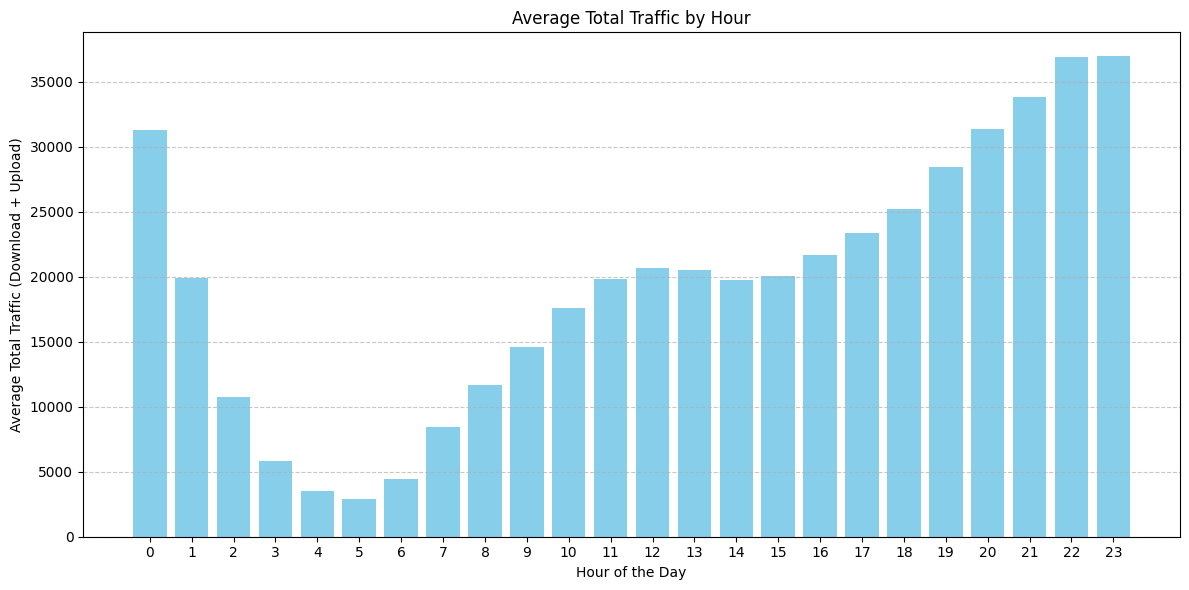

In [5]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(hourly_traffic.index, hourly_traffic.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Traffic (Download + Upload)')
plt.title('Average Total Traffic by Hour')
plt.xticks(hourly_traffic.index)  # Ensure each hour is represented
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()